In [22]:
import pandas as pd

#Reading all CPI CSV Data
bread_csv = pd.read_csv("bread_clean.csv")

coffee_csv = pd.read_csv("coffee_clean.csv")

eggs_csv = pd.read_csv("eggs_clean.csv")

#Find aggregate CPI data, stored as a dataframe, units are percent increase
agg_cpi_df = pd.concat([bread_csv, coffee_csv, eggs_csv]).groupby(level=0).mean()
print(agg_cpi_df)

      Year       Jan       Feb       Mar        Apr       May        Jun  \
0   2010.0       NaN  0.915002 -2.244567  -0.197901 -4.683961   0.254174   
1   2011.0  2.781238 -3.381937  4.224444   3.317551  0.728083   0.912698   
2   2012.0  1.594445 -2.676211 -0.441340   1.504306 -2.340447  -0.709814   
3   2013.0 -1.660972 -0.609682  0.924091  -2.076525 -0.999963   0.179683   
4   2014.0 -0.258770  0.243087  0.374597   2.974705 -1.949347  -3.949789   
5   2015.0 -0.092658 -0.175970  0.271059   0.387021 -3.293311  10.215713   
6   2016.0 -5.106271 -1.672423 -2.836491  -4.674527 -2.482471  -4.717039   
7   2017.0  6.392908 -1.783594 -1.590643  -0.107090 -0.087110  -2.109153   
8   2018.0 -1.684662 -0.866581  3.196619   3.607979 -1.340273  -9.575096   
9   2019.0 -1.905421  0.410497 -1.236502  -1.671431 -3.296169  -6.186112   
10  2020.0 -0.905272  0.925301  2.382913  12.050986 -5.584190   0.096331   
11  2021.0  0.359374  3.379945  0.331603   0.125973 -1.179758   0.611371   
12  2022.0  

In [2]:
import numpy as np

# Find inflation gap data
inflation_gap = agg_cpi_df - 2

# Fix Years being Subtracted as well
inflation_gap["Year"] = inflation_gap["Year"] + 2
print(inflation_gap)

# Pure data DF that doesn't have the years
inflation_data = inflation_gap.iloc[:,1:]

      Year       Jan       Feb       Mar        Apr       May        Jun  \
0   2010.0       NaN -1.084998 -4.244567  -2.197901 -6.683961  -1.745826   
1   2011.0  0.781238 -5.381937  2.224444   1.317551 -1.271917  -1.087302   
2   2012.0 -0.405555 -4.676211 -2.441340  -0.495694 -4.340447  -2.709814   
3   2013.0 -3.660972 -2.609682 -1.075909  -4.076525 -2.999963  -1.820317   
4   2014.0 -2.258770 -1.756913 -1.625403   0.974705 -3.949347  -5.949789   
5   2015.0 -2.092658 -2.175970 -1.728941  -1.612979 -5.293311   8.215713   
6   2016.0 -7.106271 -3.672423 -4.836491  -6.674527 -4.482471  -6.717039   
7   2017.0  4.392908 -3.783594 -3.590643  -2.107090 -2.087110  -4.109153   
8   2018.0 -3.684662 -2.866581  1.196619   1.607979 -3.340273 -11.575096   
9   2019.0 -3.905421 -1.589503 -3.236502  -3.671431 -5.296169  -8.186112   
10  2020.0 -2.905272 -1.074699  0.382913  10.050986 -7.584190  -1.903669   
11  2021.0 -1.640626  1.379945 -1.668397  -1.874027 -3.179758  -1.388629   
12  2022.0  

In [24]:
# dictionary for finding the month six months later
six_months_later = {
    "Jan": "Jul",
    "Feb": "Aug",
    "Mar": "Sep",
    "Apr": "Oct",
    "May": "Nov",
    "Jun": "Dec",
    "Jul": "Jan",
    "Aug": "Feb",
    "Sep": "Mar",
    "Oct": "Apr",
    "Nov": "May",
    "Dec": "Jun"
}

first_half_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]

#data frame for the difference between a time and its equivalent six months later
first_half_delta_gap_df = pd.DataFrame()

for i in range(len(first_half_months)):
    #find which two months I have to subtract
    month_one = first_half_months[i]
    month_two = six_months_later[month_one]

    #subtract and divide to get the final result
    first_half_delta_gap_df[month_one] = (inflation_gap[month_one] - inflation_gap[month_two]) / (np.abs(inflation_gap[month_one]) + 1)

second_half_delta_gap_df = pd.DataFrame()

second_half_months = ["Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i in range(len(second_half_months)):
    month_one = second_half_months[i]
    month_two = six_months_later[month_one]

    second_half_delta_gap_df[month_one] = (inflation_gap[month_one] - inflation_gap[month_two].shift(-1)) / (np.abs(inflation_gap[month_one]) + 1)

# Value of S in report
delta_gap_df = pd.concat([first_half_delta_gap_df,second_half_delta_gap_df], axis=1)
print(delta_gap_df)

         Jan       Feb       Mar       Apr       May       Jun       Jul  \
0        NaN -0.890896 -1.857966  1.543676 -1.466811  0.012598 -0.933593   
1   0.553734 -0.804462  0.069382  2.544011  0.846201  0.430888  0.166345   
2   0.442080 -1.199349 -0.112647 -0.929306 -0.618937 -0.292012  1.299531   
3   0.016797  0.281496  0.183060 -0.298502 -0.220859 -0.366316 -0.312389   
4  -1.124539 -0.107415  0.000622  2.153422 -0.275097 -1.018680  1.454168   
5  -0.122227 -1.422283  0.253774  1.116328  0.008327  0.880947  1.986120   
6  -0.782322  0.284740 -0.571792 -0.353097 -0.232773 -0.788901 -2.922810   
7   1.503417 -0.721948 -0.561007 -0.767627  0.485970 -1.798411 -0.006409   
8  -1.112371  0.458001  1.293031  1.442663  0.162409 -0.808877  2.150016   
9  -0.735308  0.621778 -2.074083  0.184360 -1.204484 -0.890001  2.007694   
10  0.508957  1.288304  1.408698  0.922108 -0.765582 -0.476118 -0.551896   
11  0.412802  0.570628 -1.777451  0.364528  0.032496 -0.609084 -1.340526   
12 -0.262384

In [14]:
# Goal Alignment Metric
goal_alignment_df = 1 - np.abs(inflation_gap)/2
goal_alignment_df = goal_alignment_df.iloc[:,1:]
print(goal_alignment_df)

         Jan       Feb       Mar       Apr       May       Jun       Jul  \
0        NaN  0.457501 -1.122283 -0.098951 -2.341980  0.127087 -0.147124   
1   0.609381 -1.690968 -0.112222  0.341225  0.364041  0.456349  0.897453   
2   0.797222 -1.338105 -0.220670  0.752153 -1.170224 -0.354907  0.486539   
3  -0.830486 -0.304841  0.462046 -1.038263 -0.499981  0.089841 -0.869632   
4  -0.129385  0.121544  0.187299  0.512648 -0.974673 -1.974895  0.297077   
5  -0.046329 -0.087985  0.135529  0.193510 -1.646656 -3.107857  0.142675   
6  -2.553135 -0.836212 -1.418246 -2.337263 -1.241236 -2.358519  0.617721   
7  -1.196454 -0.891797 -0.795322 -0.053545 -0.043555 -1.054577 -0.857440   
8  -0.842331 -0.433290  0.401691  0.196011 -0.670137 -4.787548  0.236791   
9  -0.952711  0.205248 -0.618251 -0.835716 -1.648085 -3.093056  0.850786   
10 -0.452636  0.462650  0.808543 -4.025493 -2.792095  0.048166 -1.446443   
11  0.179687  0.310027  0.165801  0.062986 -0.589879  0.305685 -0.365341   
12 -0.135197

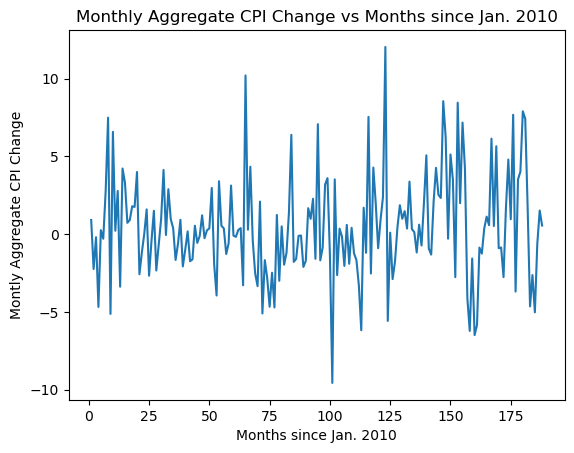

In [5]:
import matplotlib.pyplot as plt

y = agg_cpi_df.iloc[:, 1:].to_numpy().flatten()

plt.plot(y)
plt.title("Monthly Aggregate CPI Change vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Montly Aggregate CPI Change")
plt.savefig("base_aggregate_inflation_data", dpi=300, bbox_inches="tight")
plt.show()

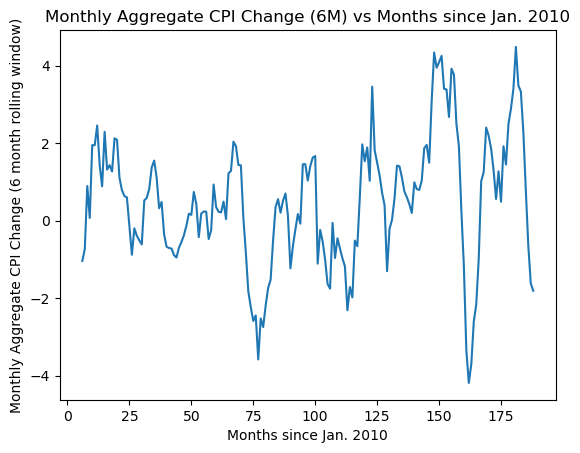

In [6]:
months = 6

rolling_averaged_agg_cpi = pd.Series(y).rolling(window=months).mean()

plt.plot(rolling_averaged_agg_cpi)
plt.title(f"Monthly Aggregate CPI Change ({months}M) vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel(f"Monthly Aggregate CPI Change ({months} month rolling window)")
plt.savefig(f"{months}_month_roll_aggregate_inflation_data", dpi=300, bbox_inches="tight")
plt.show()

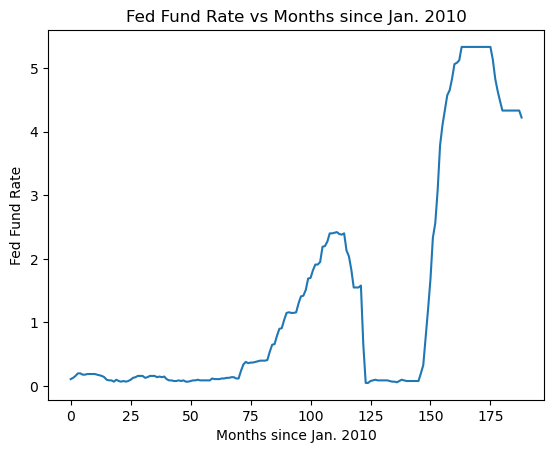

In [7]:
# Fed Fund Rate data
fed_interest_rate = pd.read_csv("fed_fund_rate.csv")

# Only looking at target scope
fed_interest_rate_df = fed_interest_rate[fed_interest_rate["Year"] >= 2010]

# Removes Years before graphing
plt.plot(fed_interest_rate_df.iloc[:, 1:].to_numpy().flatten())
plt.title("Fed Fund Rate vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Fed Fund Rate")
plt.savefig("fed_fund_rate_data", dpi=300, bbox_inches="tight")
plt.show()

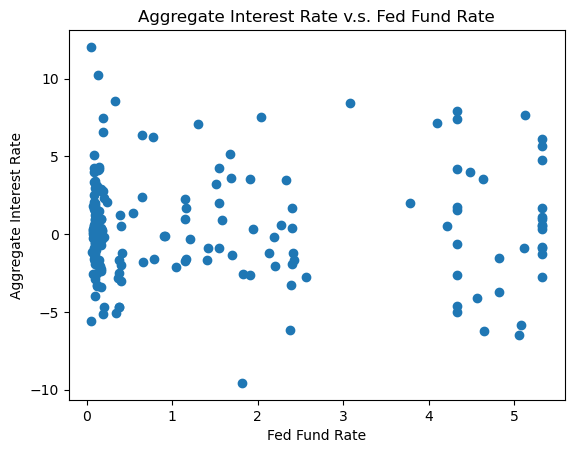

In [8]:
plt.scatter(fed_interest_rate_df.iloc[:, 1:], agg_cpi_df.iloc[:, 1:])
plt.title("Aggregate Interest Rate v.s. Fed Fund Rate")
plt.xlabel("Fed Fund Rate")
plt.ylabel("Aggregate Interest Rate")
plt.savefig("Scatterplot_of_Inflation_Rate_vs_Interest_Rate", dpi=300, bbox_inches="tight")
plt.show()

[0.16 0.2  0.2  0.18 0.18 0.19 0.19 0.19 0.19 0.18 0.17 0.16 0.14 0.1
 0.09 0.09 0.07 0.1  0.08 0.07 0.08 0.07 0.08 0.1  0.13 0.14 0.16 0.16
 0.16 0.13 0.14 0.16 0.16 0.16 0.14 0.15 0.14 0.15 0.11 0.09 0.09 0.08
 0.08 0.09 0.08 0.09 0.07 0.07 0.08 0.09 0.09 0.1  0.09 0.09 0.09 0.09
 0.09 0.12 0.11 0.11 0.11 0.12 0.12 0.13 0.13 0.14 0.14 0.12 0.12 0.24
 0.34 0.38 0.36 0.37 0.37 0.38 0.39 0.4  0.4  0.4  0.41 0.54 0.65 0.66
 0.79 0.9  0.91 1.04 1.15 1.16 1.15 1.15 1.16 1.3  1.41 1.42 1.51 1.69
 1.7  1.82 1.91 1.91 1.95 2.19 2.2  2.27 2.4  2.4  2.41 2.42 2.39 2.38
 2.4  2.13 2.04 1.83 1.55 1.55 1.55 1.58 0.65 0.05 0.05 0.08 0.09 0.1
 0.09 0.09 0.09 0.09 0.09 0.08 0.07 0.07 0.06 0.08 0.1  0.09 0.08 0.08
 0.08 0.08 0.08 0.08 0.2  0.33 0.77 1.21 1.68 2.33 2.56 3.08 3.78 4.1
 4.33 4.57 4.65 4.83 5.06 5.08 5.12 5.33 5.33 5.33 5.33 5.33 5.33 5.33
 5.33 5.33 5.33 5.33 5.33 5.33 5.13 4.83 4.64 4.48 4.33 4.33 4.33 4.33
 4.33 4.33 4.33 4.33 4.22  nan  nan  nan  nan  nan]


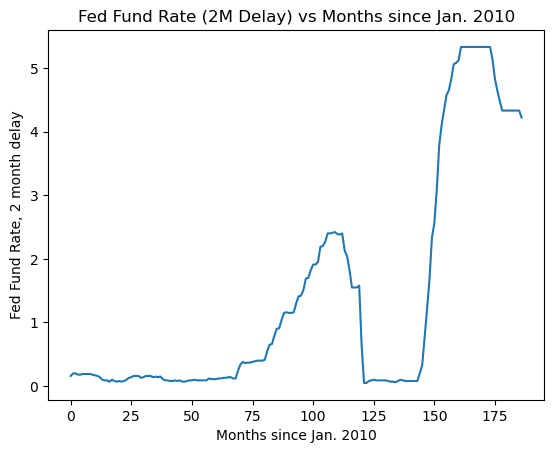

In [9]:
# AI Assisted Code
y_vals = fed_interest_rate_df.iloc[:, 1:].to_numpy().ravel()

# Shift X by two, so that we assume the Fed responds to the previous months' inflation rate.
y_shifted = np.roll(y_vals, -2)   # shift left by 2

# Last two values should be NaN, roll() moves the first two values to the end.
y_shifted[-2:] = np.nan

print(y_shifted)

plt.plot(y_shifted)
plt.title("Fed Fund Rate (2M Delay) vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Fed Fund Rate, 2 month delay")
plt.savefig("2_month_delay_fed_fund_rate_data", dpi=300, bbox_inches="tight")
plt.show()

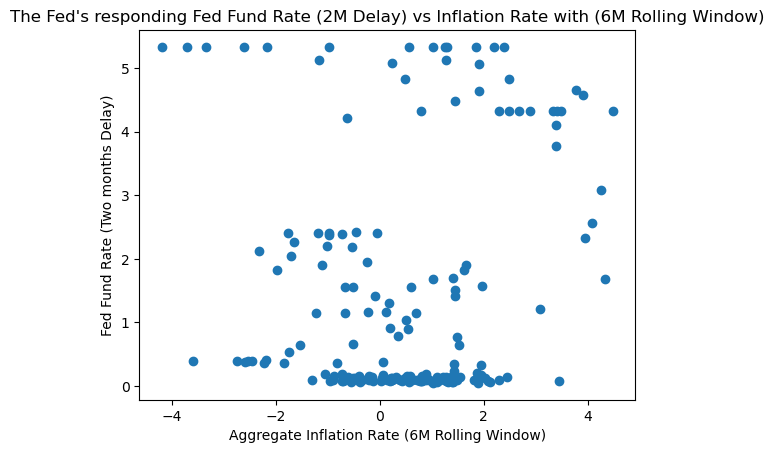

In [10]:
plt.scatter(rolling_averaged_agg_cpi, y_shifted)
plt.title("The Fed's responding Fed Fund Rate (2M Delay) vs Inflation Rate with (6M Rolling Window)")
plt.xlabel("Aggregate Inflation Rate (6M Rolling Window)")
plt.ylabel("Fed Fund Rate (Two months Delay)")
plt.savefig("Fed_Fund_Rate_as_response_to_Inflation_6_month_rolling", dpi=300, bbox_inches="tight")
plt.show()

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.1492944345222613 1.3555194628040026
586.6861225491105
597.5020861878453
0.01810196799101127


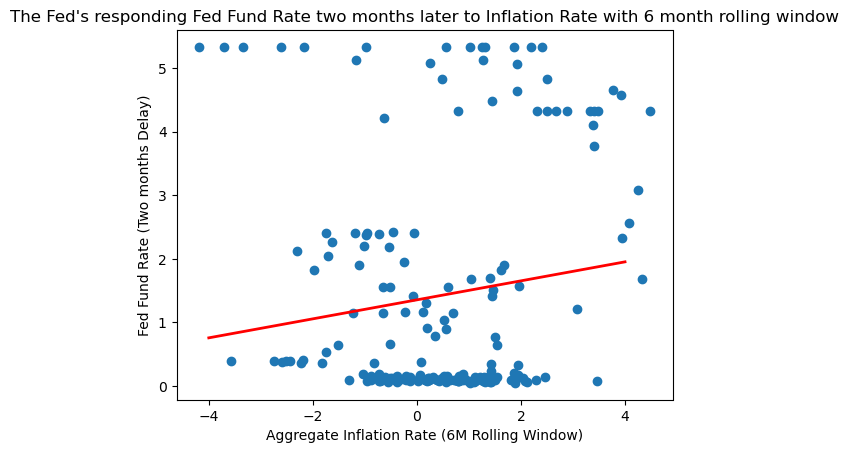

In [11]:
print(type(rolling_averaged_agg_cpi))
print(type(y_shifted))

mask = ~np.isnan(rolling_averaged_agg_cpi) & ~np.isnan(y_shifted)
x2 = rolling_averaged_agg_cpi.to_numpy()[mask]
y2 = y_shifted[mask]
print(type(x2))
m, b = np.polyfit(x2,y2,1)

print(m, b)
x_values = np.linspace(-4,4,100)
y_values = m * x_values + b

y_pred = m * x2 + b

ss_res = np.sum((y2 - y_pred)**2)
ss_tot = np.sum((y2 - np.mean(y2))**2)
r2 = 1 - (ss_res/ss_tot)
print(ss_res)
print(ss_tot)
print(r2)

plt.plot(x_values, y_values, color='red', linewidth=2)

plt.scatter(rolling_averaged_agg_cpi, y_shifted)
plt.title("The Fed's responding Fed Fund Rate two months later to Inflation Rate with 6 month rolling window")
plt.xlabel("Aggregate Inflation Rate (6M Rolling Window)")
plt.ylabel("Fed Fund Rate (Two months Delay)")
plt.savefig("Linear_Regression", dpi=300, bbox_inches="tight")
plt.show()

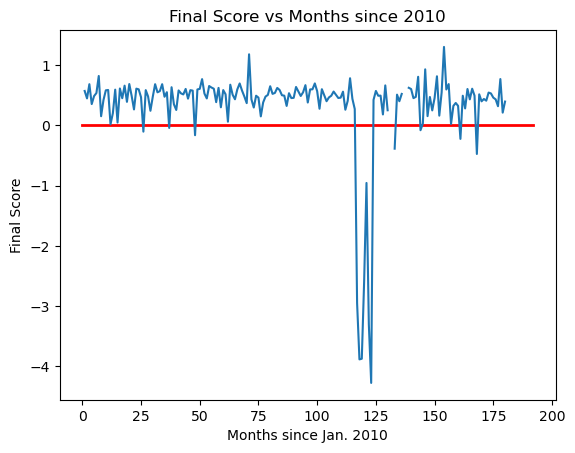

In [63]:
# Metric

effectiveness_metric = 4*(m*(1.1**delta_gap_df)*(1.1**goal_alignment_df)).to_numpy().flatten()

%store -r U
economic_damage_metric = U

final_metric = effectiveness_metric - economic_damage_metric
plt.plot(np.linspace(0, 192, 500), 0*np.linspace(0, 192, 500), color='red', linewidth=2)
plt.plot(final_metric)
plt.title("Final Score vs Months since 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Final Score")
plt.savefig("final_score_graph", dpi=300, bbox_inches="tight")
plt.show()